In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x = df[['feature1', 'feature2']].values
y = df['price'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

KeyboardInterrupt: 

In [10]:
model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss = 'mse')

In [13]:
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 5ms/step - loss: 25.1498
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 24.8632
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5425
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 25.4051
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 25.1894
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 24.6528
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 25.1302
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 25.3062
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 24.7621
Epoch 10/250
22/22 [==============================] - 0s 4ms/step - loss: 24.7925
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 25.1397
Epoch 12/250
22/22 [==============================] - 0s 3ms/step - loss: 24.7065
Epoch 13/250
22/22 [=====

<Axes: >

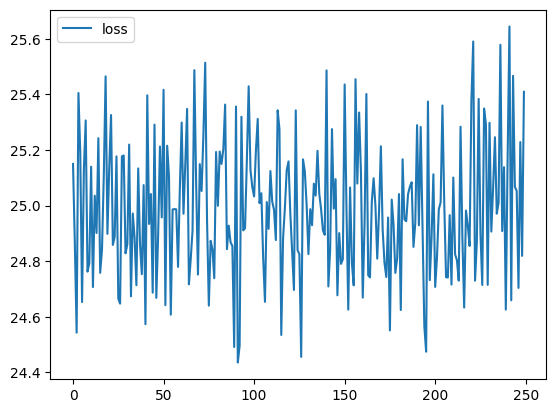

In [14]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [15]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 23.5561


23.556119918823242

In [16]:
pred = model.predict(x_test)

10/10 [==============================] - 0s 3ms/step


In [17]:
pred_s = pd.Series(pred.reshape(300,))

In [18]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df, pred_s], axis = 1)

<Axes: >

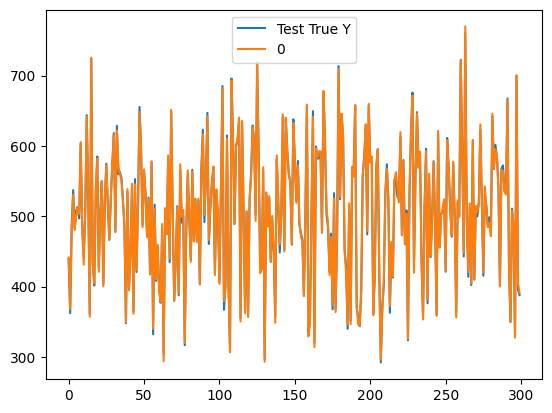

In [19]:
pred_df.plot()

In [20]:
new_gem = [[998,1000]]

In [22]:
new_gem = scaler.transform(new_gem)

In [23]:
model.predict(new_gem)

1/1 [==============================] - 0s 75ms/step


array([[419.26556]], dtype=float32)

In [24]:
from tensorflow.keras.models import load_model